In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [17]:
#Load data
train = pd.read_csv("Dataset/poker-hand-testing.data",header = None)
test = pd.read_csv("Dataset/poker-hand-training-true.data",header = None)
#Grab values
train = train.values
test = test.values
#Grab features
train_features = train[:,:10]
test_features = test[:,:10]
#Grab labels
train_labels = train[:,-1]
test_labels = test[:,-1]
#Grab 20 samples to predict
predict_features = train_features[100000:100021]
predict_labels = train_labels[100000:100021]
#Take only 50000 samples do train and test
train_features = train_features[:50000]
train_labels = train_labels[:50000]

In [18]:
#Number of neurons in each layers
L1 = 200
L2 = 100
L3 = 60
L4 = 30
L5 = 10

In [19]:
#Placeholders
X = tf.placeholder(tf.float32, [None, None])
Y_true = tf.placeholder(tf.float32, [None, None])
keep_prob = tf.placeholder(tf.float32)

In [20]:
#Weights and biases
W1 = tf.Variable(tf.truncated_normal([10, L1], stddev=0.1))
b1 = tf.Variable(tf.zeros([L1]))

W2 = tf.Variable(tf.truncated_normal([L1, L2], stddev=0.1))
b2 = tf.Variable(tf.zeros([L2]))

W3 = tf.Variable(tf.truncated_normal([L2, L3], stddev=0.1))
b3 = tf.Variable(tf.zeros([L3]))

W4 = tf.Variable(tf.truncated_normal([L3, L4], stddev=0.1))
b4 = tf.Variable(tf.zeros([L4]))

W5 = tf.Variable(tf.truncated_normal([L4, L5], stddev=0.1))
b5 = tf.Variable(tf.zeros([L5]))

In [21]:
#Create layers with dropout
Y1 = tf.nn.relu(tf.matmul(X, W1) + b1)
Y1 = tf.nn.dropout(Y1, keep_prob)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)
Y2 = tf.nn.dropout(Y2, keep_prob)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + b3)
Y3 = tf.nn.dropout(Y3, keep_prob)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + b4)
Y4 = tf.nn.dropout(Y4, keep_prob)

#Softmax
Ylogits = tf.matmul(Y4, W5) + b5
Y = tf.nn.softmax(Ylogits)

In [22]:
#Loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y_true)
cross_entropy = tf.reduce_mean(cross_entropy)
                                                          
#Accuracy
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
 
#Optimizer
train_step = tf.train.AdamOptimizer(learning_rate=0.003).minimize(cross_entropy)

In [23]:
#Create hot encoding vector for train and test labels
test_hot_encode = np.zeros((len(test_labels), 10))
test_hot_encode[np.arange(len(test_labels)), test_labels] = 1

train_hot_encode = np.zeros((len(train_labels), 10))
train_hot_encode[np.arange(len(train_labels)), train_labels] = 1

In [24]:
#Epochs and batch size
num_epochs = 300
batchsize=5000

#Init global variables
init = tf.global_variables_initializer()

#Empty lists to plots
train_losses = list()
train_acc = list()
test_losses = list()
test_acc = list()
pred = list()

#Create session
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for i in range(0,len(train_features),batchsize):
            batch_X_train =train_features[i:i+batchsize]
            batch_Y_train =train_hot_encode[i:i+batchsize]
            
            #Two lines to visualization data (not to training)
            acc_trn, loss_trn = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X_train, Y_true: batch_Y_train, keep_prob: 1.0})
            acc_tst, loss_tst = sess.run([accuracy, cross_entropy], feed_dict={X: test_features, Y_true: test_hot_encode, keep_prob: 1.0})
            
            #Print statistics
            print("epoch{0} #{1} Trn acc={2:2.3f} , Trn loss={3:3.3f} Tst acc={4:2.3f} , Tst loss={5:3.3f}".format(epoch,i,acc_trn,loss_trn,acc_tst,loss_tst))
            
            #Add acc and loss to lists
            train_losses.append(loss_trn)
            train_acc.append(acc_trn)
            test_losses.append(loss_tst)
            test_acc.append(acc_tst)
            
            #TRAIN MODEL
            sess.run(train_step, feed_dict={X: batch_X_train, Y_true: batch_Y_train, keep_prob: 0.75})
            
    #At the end predict 20 samples
    y_pred = sess.run(tf.argmax(Y, 1), feed_dict={X: predict_features, keep_prob: 1.0})

epoch0 #0 Trn acc=0.320 , Trn loss=2.266 Tst acc=0.311 , Tst loss=2.267
epoch0 #5000 Trn acc=0.503 , Trn loss=1.990 Tst acc=0.487 , Tst loss=1.989
epoch0 #10000 Trn acc=0.499 , Trn loss=1.729 Tst acc=0.500 , Tst loss=1.727
epoch0 #15000 Trn acc=0.500 , Trn loss=1.436 Tst acc=0.500 , Tst loss=1.435
epoch0 #20000 Trn acc=0.498 , Trn loss=1.181 Tst acc=0.500 , Tst loss=1.184
epoch0 #25000 Trn acc=0.510 , Trn loss=1.065 Tst acc=0.500 , Tst loss=1.076
epoch0 #30000 Trn acc=0.488 , Trn loss=1.098 Tst acc=0.500 , Tst loss=1.082
epoch0 #35000 Trn acc=0.503 , Trn loss=1.111 Tst acc=0.500 , Tst loss=1.095
epoch0 #40000 Trn acc=0.497 , Trn loss=1.081 Tst acc=0.500 , Tst loss=1.088
epoch0 #45000 Trn acc=0.501 , Trn loss=1.077 Tst acc=0.500 , Tst loss=1.067
epoch1 #0 Trn acc=0.503 , Trn loss=1.053 Tst acc=0.500 , Tst loss=1.041
epoch1 #5000 Trn acc=0.516 , Trn loss=1.037 Tst acc=0.500 , Tst loss=1.025
epoch1 #10000 Trn acc=0.497 , Trn loss=1.031 Tst acc=0.500 , Tst loss=1.023
epoch1 #15000 Trn acc=

epoch11 #10000 Trn acc=0.497 , Trn loss=0.969 Tst acc=0.500 , Tst loss=0.970
epoch11 #15000 Trn acc=0.500 , Trn loss=0.955 Tst acc=0.500 , Tst loss=0.970
epoch11 #20000 Trn acc=0.498 , Trn loss=0.968 Tst acc=0.500 , Tst loss=0.970
epoch11 #25000 Trn acc=0.510 , Trn loss=0.949 Tst acc=0.500 , Tst loss=0.970
epoch11 #30000 Trn acc=0.488 , Trn loss=0.974 Tst acc=0.500 , Tst loss=0.970
epoch11 #35000 Trn acc=0.504 , Trn loss=0.968 Tst acc=0.500 , Tst loss=0.970
epoch11 #40000 Trn acc=0.498 , Trn loss=0.965 Tst acc=0.500 , Tst loss=0.970
epoch11 #45000 Trn acc=0.502 , Trn loss=0.972 Tst acc=0.500 , Tst loss=0.970
epoch12 #0 Trn acc=0.505 , Trn loss=0.979 Tst acc=0.501 , Tst loss=0.970
epoch12 #5000 Trn acc=0.517 , Trn loss=0.976 Tst acc=0.500 , Tst loss=0.970
epoch12 #10000 Trn acc=0.497 , Trn loss=0.968 Tst acc=0.500 , Tst loss=0.969
epoch12 #15000 Trn acc=0.500 , Trn loss=0.953 Tst acc=0.500 , Tst loss=0.969
epoch12 #20000 Trn acc=0.498 , Trn loss=0.967 Tst acc=0.500 , Tst loss=0.969
epoc

epoch22 #0 Trn acc=0.552 , Trn loss=0.962 Tst acc=0.548 , Tst loss=0.952
epoch22 #5000 Trn acc=0.549 , Trn loss=0.957 Tst acc=0.545 , Tst loss=0.951
epoch22 #10000 Trn acc=0.535 , Trn loss=0.951 Tst acc=0.542 , Tst loss=0.952
epoch22 #15000 Trn acc=0.538 , Trn loss=0.935 Tst acc=0.540 , Tst loss=0.953
epoch22 #20000 Trn acc=0.543 , Trn loss=0.947 Tst acc=0.538 , Tst loss=0.953
epoch22 #25000 Trn acc=0.542 , Trn loss=0.932 Tst acc=0.541 , Tst loss=0.952
epoch22 #30000 Trn acc=0.532 , Trn loss=0.950 Tst acc=0.543 , Tst loss=0.951
epoch22 #35000 Trn acc=0.553 , Trn loss=0.947 Tst acc=0.548 , Tst loss=0.950
epoch22 #40000 Trn acc=0.550 , Trn loss=0.943 Tst acc=0.549 , Tst loss=0.950
epoch22 #45000 Trn acc=0.548 , Trn loss=0.952 Tst acc=0.550 , Tst loss=0.950
epoch23 #0 Trn acc=0.556 , Trn loss=0.960 Tst acc=0.550 , Tst loss=0.950
epoch23 #5000 Trn acc=0.549 , Trn loss=0.955 Tst acc=0.548 , Tst loss=0.949
epoch23 #10000 Trn acc=0.540 , Trn loss=0.949 Tst acc=0.546 , Tst loss=0.950
epoch23 #

epoch32 #40000 Trn acc=0.564 , Trn loss=0.926 Tst acc=0.563 , Tst loss=0.933
epoch32 #45000 Trn acc=0.559 , Trn loss=0.935 Tst acc=0.563 , Tst loss=0.933
epoch33 #0 Trn acc=0.562 , Trn loss=0.945 Tst acc=0.558 , Tst loss=0.933
epoch33 #5000 Trn acc=0.561 , Trn loss=0.936 Tst acc=0.558 , Tst loss=0.933
epoch33 #10000 Trn acc=0.550 , Trn loss=0.930 Tst acc=0.556 , Tst loss=0.933
epoch33 #15000 Trn acc=0.556 , Trn loss=0.916 Tst acc=0.557 , Tst loss=0.933
epoch33 #20000 Trn acc=0.561 , Trn loss=0.925 Tst acc=0.558 , Tst loss=0.933
epoch33 #25000 Trn acc=0.556 , Trn loss=0.913 Tst acc=0.557 , Tst loss=0.933
epoch33 #30000 Trn acc=0.547 , Trn loss=0.930 Tst acc=0.553 , Tst loss=0.934
epoch33 #35000 Trn acc=0.565 , Trn loss=0.928 Tst acc=0.558 , Tst loss=0.932
epoch33 #40000 Trn acc=0.566 , Trn loss=0.922 Tst acc=0.562 , Tst loss=0.931
epoch33 #45000 Trn acc=0.562 , Trn loss=0.932 Tst acc=0.565 , Tst loss=0.930
epoch34 #0 Trn acc=0.564 , Trn loss=0.942 Tst acc=0.565 , Tst loss=0.930
epoch34 

epoch43 #30000 Trn acc=0.569 , Trn loss=0.908 Tst acc=0.573 , Tst loss=0.914
epoch43 #35000 Trn acc=0.580 , Trn loss=0.907 Tst acc=0.579 , Tst loss=0.913
epoch43 #40000 Trn acc=0.580 , Trn loss=0.905 Tst acc=0.580 , Tst loss=0.912
epoch43 #45000 Trn acc=0.573 , Trn loss=0.916 Tst acc=0.580 , Tst loss=0.913
epoch44 #0 Trn acc=0.585 , Trn loss=0.923 Tst acc=0.581 , Tst loss=0.914
epoch44 #5000 Trn acc=0.582 , Trn loss=0.915 Tst acc=0.583 , Tst loss=0.912
epoch44 #10000 Trn acc=0.569 , Trn loss=0.909 Tst acc=0.580 , Tst loss=0.912
epoch44 #15000 Trn acc=0.575 , Trn loss=0.894 Tst acc=0.577 , Tst loss=0.912
epoch44 #20000 Trn acc=0.582 , Trn loss=0.902 Tst acc=0.573 , Tst loss=0.912
epoch44 #25000 Trn acc=0.573 , Trn loss=0.889 Tst acc=0.574 , Tst loss=0.912
epoch44 #30000 Trn acc=0.566 , Trn loss=0.908 Tst acc=0.572 , Tst loss=0.912
epoch44 #35000 Trn acc=0.583 , Trn loss=0.903 Tst acc=0.579 , Tst loss=0.909
epoch44 #40000 Trn acc=0.577 , Trn loss=0.904 Tst acc=0.580 , Tst loss=0.909
epoc

epoch54 #20000 Trn acc=0.600 , Trn loss=0.869 Tst acc=0.598 , Tst loss=0.878
epoch54 #25000 Trn acc=0.604 , Trn loss=0.855 Tst acc=0.599 , Tst loss=0.879
epoch54 #30000 Trn acc=0.592 , Trn loss=0.874 Tst acc=0.595 , Tst loss=0.880
epoch54 #35000 Trn acc=0.612 , Trn loss=0.867 Tst acc=0.601 , Tst loss=0.879
epoch54 #40000 Trn acc=0.600 , Trn loss=0.870 Tst acc=0.598 , Tst loss=0.879
epoch54 #45000 Trn acc=0.594 , Trn loss=0.883 Tst acc=0.597 , Tst loss=0.881
epoch55 #0 Trn acc=0.614 , Trn loss=0.883 Tst acc=0.605 , Tst loss=0.878
epoch55 #5000 Trn acc=0.609 , Trn loss=0.879 Tst acc=0.609 , Tst loss=0.877
epoch55 #10000 Trn acc=0.600 , Trn loss=0.875 Tst acc=0.604 , Tst loss=0.877
epoch55 #15000 Trn acc=0.598 , Trn loss=0.861 Tst acc=0.599 , Tst loss=0.879
epoch55 #20000 Trn acc=0.598 , Trn loss=0.869 Tst acc=0.599 , Tst loss=0.877
epoch55 #25000 Trn acc=0.614 , Trn loss=0.851 Tst acc=0.606 , Tst loss=0.875
epoch55 #30000 Trn acc=0.600 , Trn loss=0.869 Tst acc=0.602 , Tst loss=0.875
epoc

epoch65 #20000 Trn acc=0.658 , Trn loss=0.813 Tst acc=0.650 , Tst loss=0.822
epoch65 #25000 Trn acc=0.653 , Trn loss=0.802 Tst acc=0.652 , Tst loss=0.821
epoch65 #30000 Trn acc=0.642 , Trn loss=0.818 Tst acc=0.647 , Tst loss=0.821
epoch65 #35000 Trn acc=0.667 , Trn loss=0.801 Tst acc=0.656 , Tst loss=0.815
epoch65 #40000 Trn acc=0.665 , Trn loss=0.806 Tst acc=0.657 , Tst loss=0.816
epoch65 #45000 Trn acc=0.661 , Trn loss=0.814 Tst acc=0.662 , Tst loss=0.811
epoch66 #0 Trn acc=0.666 , Trn loss=0.815 Tst acc=0.657 , Tst loss=0.812
epoch66 #5000 Trn acc=0.669 , Trn loss=0.808 Tst acc=0.662 , Tst loss=0.809
epoch66 #10000 Trn acc=0.659 , Trn loss=0.807 Tst acc=0.660 , Tst loss=0.807
epoch66 #15000 Trn acc=0.655 , Trn loss=0.790 Tst acc=0.654 , Tst loss=0.810
epoch66 #20000 Trn acc=0.656 , Trn loss=0.803 Tst acc=0.653 , Tst loss=0.811
epoch66 #25000 Trn acc=0.662 , Trn loss=0.788 Tst acc=0.656 , Tst loss=0.810
epoch66 #30000 Trn acc=0.655 , Trn loss=0.805 Tst acc=0.656 , Tst loss=0.810
epoc

epoch76 #10000 Trn acc=0.716 , Trn loss=0.711 Tst acc=0.723 , Tst loss=0.708
epoch76 #15000 Trn acc=0.712 , Trn loss=0.705 Tst acc=0.711 , Tst loss=0.720
epoch76 #20000 Trn acc=0.721 , Trn loss=0.711 Tst acc=0.719 , Tst loss=0.716
epoch76 #25000 Trn acc=0.722 , Trn loss=0.700 Tst acc=0.730 , Tst loss=0.715
epoch76 #30000 Trn acc=0.717 , Trn loss=0.720 Tst acc=0.718 , Tst loss=0.724
epoch76 #35000 Trn acc=0.723 , Trn loss=0.709 Tst acc=0.717 , Tst loss=0.723
epoch76 #40000 Trn acc=0.724 , Trn loss=0.714 Tst acc=0.718 , Tst loss=0.721
epoch76 #45000 Trn acc=0.721 , Trn loss=0.715 Tst acc=0.727 , Tst loss=0.713
epoch77 #0 Trn acc=0.719 , Trn loss=0.726 Tst acc=0.723 , Tst loss=0.718
epoch77 #5000 Trn acc=0.722 , Trn loss=0.720 Tst acc=0.718 , Tst loss=0.722
epoch77 #10000 Trn acc=0.718 , Trn loss=0.711 Tst acc=0.732 , Tst loss=0.707
epoch77 #15000 Trn acc=0.726 , Trn loss=0.696 Tst acc=0.732 , Tst loss=0.708
epoch77 #20000 Trn acc=0.720 , Trn loss=0.706 Tst acc=0.721 , Tst loss=0.714
epoc

epoch87 #25000 Trn acc=0.763 , Trn loss=0.614 Tst acc=0.766 , Tst loss=0.623
epoch87 #30000 Trn acc=0.755 , Trn loss=0.628 Tst acc=0.764 , Tst loss=0.625
epoch87 #35000 Trn acc=0.760 , Trn loss=0.621 Tst acc=0.760 , Tst loss=0.633
epoch87 #40000 Trn acc=0.763 , Trn loss=0.623 Tst acc=0.764 , Tst loss=0.630
epoch87 #45000 Trn acc=0.764 , Trn loss=0.626 Tst acc=0.769 , Tst loss=0.624
epoch88 #0 Trn acc=0.766 , Trn loss=0.630 Tst acc=0.769 , Tst loss=0.625
epoch88 #5000 Trn acc=0.773 , Trn loss=0.621 Tst acc=0.769 , Tst loss=0.623
epoch88 #10000 Trn acc=0.761 , Trn loss=0.623 Tst acc=0.767 , Tst loss=0.621
epoch88 #15000 Trn acc=0.756 , Trn loss=0.614 Tst acc=0.770 , Tst loss=0.619
epoch88 #20000 Trn acc=0.771 , Trn loss=0.611 Tst acc=0.770 , Tst loss=0.618
epoch88 #25000 Trn acc=0.770 , Trn loss=0.605 Tst acc=0.771 , Tst loss=0.618
epoch88 #30000 Trn acc=0.755 , Trn loss=0.629 Tst acc=0.763 , Tst loss=0.626
epoch88 #35000 Trn acc=0.770 , Trn loss=0.608 Tst acc=0.770 , Tst loss=0.621
epoc

epoch98 #35000 Trn acc=0.782 , Trn loss=0.571 Tst acc=0.780 , Tst loss=0.584
epoch98 #40000 Trn acc=0.783 , Trn loss=0.570 Tst acc=0.784 , Tst loss=0.579
epoch98 #45000 Trn acc=0.776 , Trn loss=0.582 Tst acc=0.783 , Tst loss=0.580
epoch99 #0 Trn acc=0.777 , Trn loss=0.588 Tst acc=0.779 , Tst loss=0.583
epoch99 #5000 Trn acc=0.789 , Trn loss=0.576 Tst acc=0.778 , Tst loss=0.581
epoch99 #10000 Trn acc=0.774 , Trn loss=0.583 Tst acc=0.779 , Tst loss=0.581
epoch99 #15000 Trn acc=0.773 , Trn loss=0.573 Tst acc=0.781 , Tst loss=0.581
epoch99 #20000 Trn acc=0.781 , Trn loss=0.574 Tst acc=0.782 , Tst loss=0.581
epoch99 #25000 Trn acc=0.782 , Trn loss=0.569 Tst acc=0.782 , Tst loss=0.578
epoch99 #30000 Trn acc=0.771 , Trn loss=0.583 Tst acc=0.776 , Tst loss=0.583
epoch99 #35000 Trn acc=0.778 , Trn loss=0.572 Tst acc=0.775 , Tst loss=0.586
epoch99 #40000 Trn acc=0.779 , Trn loss=0.572 Tst acc=0.782 , Tst loss=0.578
epoch99 #45000 Trn acc=0.774 , Trn loss=0.583 Tst acc=0.784 , Tst loss=0.577
epoc

epoch109 #40000 Trn acc=0.797 , Trn loss=0.534 Tst acc=0.798 , Tst loss=0.546
epoch109 #45000 Trn acc=0.787 , Trn loss=0.546 Tst acc=0.798 , Tst loss=0.543
epoch110 #0 Trn acc=0.787 , Trn loss=0.543 Tst acc=0.793 , Tst loss=0.539
epoch110 #5000 Trn acc=0.778 , Trn loss=0.560 Tst acc=0.774 , Tst loss=0.566
epoch110 #10000 Trn acc=0.785 , Trn loss=0.551 Tst acc=0.788 , Tst loss=0.552
epoch110 #15000 Trn acc=0.791 , Trn loss=0.538 Tst acc=0.793 , Tst loss=0.551
epoch110 #20000 Trn acc=0.780 , Trn loss=0.558 Tst acc=0.778 , Tst loss=0.568
epoch110 #25000 Trn acc=0.782 , Trn loss=0.550 Tst acc=0.783 , Tst loss=0.561
epoch110 #30000 Trn acc=0.787 , Trn loss=0.548 Tst acc=0.792 , Tst loss=0.548
epoch110 #35000 Trn acc=0.794 , Trn loss=0.541 Tst acc=0.792 , Tst loss=0.555
epoch110 #40000 Trn acc=0.794 , Trn loss=0.552 Tst acc=0.789 , Tst loss=0.561
epoch110 #45000 Trn acc=0.780 , Trn loss=0.574 Tst acc=0.785 , Tst loss=0.570
epoch111 #0 Trn acc=0.788 , Trn loss=0.565 Tst acc=0.789 , Tst loss=0

epoch120 #45000 Trn acc=0.821 , Trn loss=0.474 Tst acc=0.828 , Tst loss=0.476
epoch121 #0 Trn acc=0.821 , Trn loss=0.483 Tst acc=0.823 , Tst loss=0.476
epoch121 #5000 Trn acc=0.827 , Trn loss=0.464 Tst acc=0.827 , Tst loss=0.467
epoch121 #10000 Trn acc=0.823 , Trn loss=0.463 Tst acc=0.835 , Tst loss=0.459
epoch121 #15000 Trn acc=0.833 , Trn loss=0.450 Tst acc=0.834 , Tst loss=0.461
epoch121 #20000 Trn acc=0.838 , Trn loss=0.456 Tst acc=0.837 , Tst loss=0.461
epoch121 #25000 Trn acc=0.830 , Trn loss=0.462 Tst acc=0.827 , Tst loss=0.472
epoch121 #30000 Trn acc=0.821 , Trn loss=0.475 Tst acc=0.826 , Tst loss=0.476
epoch121 #35000 Trn acc=0.847 , Trn loss=0.454 Tst acc=0.841 , Tst loss=0.470
epoch121 #40000 Trn acc=0.838 , Trn loss=0.467 Tst acc=0.841 , Tst loss=0.471
epoch121 #45000 Trn acc=0.829 , Trn loss=0.470 Tst acc=0.836 , Tst loss=0.471
epoch122 #0 Trn acc=0.831 , Trn loss=0.472 Tst acc=0.831 , Tst loss=0.469
epoch122 #5000 Trn acc=0.834 , Trn loss=0.464 Tst acc=0.829 , Tst loss=0.

epoch131 #30000 Trn acc=0.846 , Trn loss=0.439 Tst acc=0.848 , Tst loss=0.441
epoch131 #35000 Trn acc=0.863 , Trn loss=0.407 Tst acc=0.863 , Tst loss=0.420
epoch131 #40000 Trn acc=0.865 , Trn loss=0.408 Tst acc=0.867 , Tst loss=0.416
epoch131 #45000 Trn acc=0.864 , Trn loss=0.410 Tst acc=0.869 , Tst loss=0.413
epoch132 #0 Trn acc=0.860 , Trn loss=0.418 Tst acc=0.862 , Tst loss=0.414
epoch132 #5000 Trn acc=0.865 , Trn loss=0.407 Tst acc=0.861 , Tst loss=0.412
epoch132 #10000 Trn acc=0.841 , Trn loss=0.418 Tst acc=0.852 , Tst loss=0.414
epoch132 #15000 Trn acc=0.862 , Trn loss=0.399 Tst acc=0.855 , Tst loss=0.413
epoch132 #20000 Trn acc=0.864 , Trn loss=0.402 Tst acc=0.865 , Tst loss=0.409
epoch132 #25000 Trn acc=0.878 , Trn loss=0.396 Tst acc=0.873 , Tst loss=0.408
epoch132 #30000 Trn acc=0.870 , Trn loss=0.409 Tst acc=0.866 , Tst loss=0.414
epoch132 #35000 Trn acc=0.867 , Trn loss=0.400 Tst acc=0.863 , Tst loss=0.416
epoch132 #40000 Trn acc=0.858 , Trn loss=0.400 Tst acc=0.866 , Tst lo

epoch142 #35000 Trn acc=0.893 , Trn loss=0.324 Tst acc=0.894 , Tst loss=0.341
epoch142 #40000 Trn acc=0.878 , Trn loss=0.339 Tst acc=0.884 , Tst loss=0.349
epoch142 #45000 Trn acc=0.886 , Trn loss=0.335 Tst acc=0.889 , Tst loss=0.340
epoch143 #0 Trn acc=0.884 , Trn loss=0.342 Tst acc=0.887 , Tst loss=0.344
epoch143 #5000 Trn acc=0.886 , Trn loss=0.348 Tst acc=0.885 , Tst loss=0.350
epoch143 #10000 Trn acc=0.872 , Trn loss=0.347 Tst acc=0.882 , Tst loss=0.351
epoch143 #15000 Trn acc=0.893 , Trn loss=0.326 Tst acc=0.885 , Tst loss=0.348
epoch143 #20000 Trn acc=0.883 , Trn loss=0.338 Tst acc=0.886 , Tst loss=0.346
epoch143 #25000 Trn acc=0.887 , Trn loss=0.336 Tst acc=0.885 , Tst loss=0.350
epoch143 #30000 Trn acc=0.893 , Trn loss=0.334 Tst acc=0.894 , Tst loss=0.343
epoch143 #35000 Trn acc=0.897 , Trn loss=0.323 Tst acc=0.895 , Tst loss=0.341
epoch143 #40000 Trn acc=0.893 , Trn loss=0.331 Tst acc=0.895 , Tst loss=0.343
epoch143 #45000 Trn acc=0.892 , Trn loss=0.339 Tst acc=0.897 , Tst lo

epoch153 #40000 Trn acc=0.904 , Trn loss=0.291 Tst acc=0.906 , Tst loss=0.305
epoch153 #45000 Trn acc=0.870 , Trn loss=0.353 Tst acc=0.872 , Tst loss=0.360
epoch154 #0 Trn acc=0.880 , Trn loss=0.336 Tst acc=0.884 , Tst loss=0.336
epoch154 #5000 Trn acc=0.913 , Trn loss=0.306 Tst acc=0.908 , Tst loss=0.311
epoch154 #10000 Trn acc=0.888 , Trn loss=0.317 Tst acc=0.893 , Tst loss=0.323
epoch154 #15000 Trn acc=0.902 , Trn loss=0.303 Tst acc=0.897 , Tst loss=0.320
epoch154 #20000 Trn acc=0.897 , Trn loss=0.317 Tst acc=0.898 , Tst loss=0.327
epoch154 #25000 Trn acc=0.889 , Trn loss=0.331 Tst acc=0.890 , Tst loss=0.342
epoch154 #30000 Trn acc=0.885 , Trn loss=0.345 Tst acc=0.882 , Tst loss=0.352
epoch154 #35000 Trn acc=0.895 , Trn loss=0.315 Tst acc=0.895 , Tst loss=0.332
epoch154 #40000 Trn acc=0.893 , Trn loss=0.309 Tst acc=0.897 , Tst loss=0.322
epoch154 #45000 Trn acc=0.906 , Trn loss=0.294 Tst acc=0.907 , Tst loss=0.304
epoch155 #0 Trn acc=0.892 , Trn loss=0.310 Tst acc=0.893 , Tst loss=0

epoch164 #30000 Trn acc=0.924 , Trn loss=0.284 Tst acc=0.919 , Tst loss=0.296
epoch164 #35000 Trn acc=0.924 , Trn loss=0.283 Tst acc=0.922 , Tst loss=0.300
epoch164 #40000 Trn acc=0.925 , Trn loss=0.283 Tst acc=0.923 , Tst loss=0.295
epoch164 #45000 Trn acc=0.918 , Trn loss=0.294 Tst acc=0.920 , Tst loss=0.301
epoch165 #0 Trn acc=0.920 , Trn loss=0.293 Tst acc=0.921 , Tst loss=0.296
epoch165 #5000 Trn acc=0.919 , Trn loss=0.289 Tst acc=0.919 , Tst loss=0.294
epoch165 #10000 Trn acc=0.912 , Trn loss=0.290 Tst acc=0.916 , Tst loss=0.297
epoch165 #15000 Trn acc=0.927 , Trn loss=0.284 Tst acc=0.921 , Tst loss=0.300
epoch165 #20000 Trn acc=0.920 , Trn loss=0.303 Tst acc=0.918 , Tst loss=0.313
epoch165 #25000 Trn acc=0.936 , Trn loss=0.282 Tst acc=0.931 , Tst loss=0.298
epoch165 #30000 Trn acc=0.932 , Trn loss=0.287 Tst acc=0.931 , Tst loss=0.292
epoch165 #35000 Trn acc=0.932 , Trn loss=0.269 Tst acc=0.928 , Tst loss=0.286
epoch165 #40000 Trn acc=0.919 , Trn loss=0.278 Tst acc=0.922 , Tst lo

epoch175 #20000 Trn acc=0.958 , Trn loss=0.218 Tst acc=0.955 , Tst loss=0.227
epoch175 #25000 Trn acc=0.962 , Trn loss=0.216 Tst acc=0.955 , Tst loss=0.230
epoch175 #30000 Trn acc=0.952 , Trn loss=0.214 Tst acc=0.953 , Tst loss=0.221
epoch175 #35000 Trn acc=0.939 , Trn loss=0.210 Tst acc=0.942 , Tst loss=0.224
epoch175 #40000 Trn acc=0.941 , Trn loss=0.205 Tst acc=0.943 , Tst loss=0.219
epoch175 #45000 Trn acc=0.951 , Trn loss=0.207 Tst acc=0.952 , Tst loss=0.214
epoch176 #0 Trn acc=0.955 , Trn loss=0.212 Tst acc=0.957 , Tst loss=0.216
epoch176 #5000 Trn acc=0.952 , Trn loss=0.215 Tst acc=0.956 , Tst loss=0.217
epoch176 #10000 Trn acc=0.946 , Trn loss=0.215 Tst acc=0.948 , Tst loss=0.223
epoch176 #15000 Trn acc=0.946 , Trn loss=0.210 Tst acc=0.944 , Tst loss=0.226
epoch176 #20000 Trn acc=0.956 , Trn loss=0.211 Tst acc=0.953 , Tst loss=0.219
epoch176 #25000 Trn acc=0.964 , Trn loss=0.201 Tst acc=0.960 , Tst loss=0.214
epoch176 #30000 Trn acc=0.961 , Trn loss=0.200 Tst acc=0.960 , Tst lo

epoch186 #20000 Trn acc=0.956 , Trn loss=0.192 Tst acc=0.954 , Tst loss=0.199
epoch186 #25000 Trn acc=0.957 , Trn loss=0.186 Tst acc=0.952 , Tst loss=0.201
epoch186 #30000 Trn acc=0.955 , Trn loss=0.189 Tst acc=0.955 , Tst loss=0.198
epoch186 #35000 Trn acc=0.952 , Trn loss=0.182 Tst acc=0.953 , Tst loss=0.197
epoch186 #40000 Trn acc=0.949 , Trn loss=0.186 Tst acc=0.949 , Tst loss=0.200
epoch186 #45000 Trn acc=0.941 , Trn loss=0.196 Tst acc=0.946 , Tst loss=0.204
epoch187 #0 Trn acc=0.950 , Trn loss=0.195 Tst acc=0.951 , Tst loss=0.198
epoch187 #5000 Trn acc=0.955 , Trn loss=0.190 Tst acc=0.958 , Tst loss=0.191
epoch187 #10000 Trn acc=0.961 , Trn loss=0.179 Tst acc=0.960 , Tst loss=0.189
epoch187 #15000 Trn acc=0.965 , Trn loss=0.171 Tst acc=0.961 , Tst loss=0.188
epoch187 #20000 Trn acc=0.959 , Trn loss=0.189 Tst acc=0.958 , Tst loss=0.194
epoch187 #25000 Trn acc=0.958 , Trn loss=0.187 Tst acc=0.957 , Tst loss=0.196
epoch187 #30000 Trn acc=0.955 , Trn loss=0.189 Tst acc=0.955 , Tst lo

epoch197 #20000 Trn acc=0.955 , Trn loss=0.200 Tst acc=0.956 , Tst loss=0.208
epoch197 #25000 Trn acc=0.958 , Trn loss=0.194 Tst acc=0.954 , Tst loss=0.207
epoch197 #30000 Trn acc=0.947 , Trn loss=0.205 Tst acc=0.948 , Tst loss=0.211
epoch197 #35000 Trn acc=0.958 , Trn loss=0.188 Tst acc=0.953 , Tst loss=0.205
epoch197 #40000 Trn acc=0.956 , Trn loss=0.193 Tst acc=0.955 , Tst loss=0.207
epoch197 #45000 Trn acc=0.961 , Trn loss=0.188 Tst acc=0.959 , Tst loss=0.201
epoch198 #0 Trn acc=0.952 , Trn loss=0.206 Tst acc=0.948 , Tst loss=0.210
epoch198 #5000 Trn acc=0.947 , Trn loss=0.211 Tst acc=0.947 , Tst loss=0.215
epoch198 #10000 Trn acc=0.952 , Trn loss=0.199 Tst acc=0.952 , Tst loss=0.210
epoch198 #15000 Trn acc=0.960 , Trn loss=0.194 Tst acc=0.953 , Tst loss=0.214
epoch198 #20000 Trn acc=0.946 , Trn loss=0.212 Tst acc=0.947 , Tst loss=0.220
epoch198 #25000 Trn acc=0.948 , Trn loss=0.210 Tst acc=0.943 , Tst loss=0.222
epoch198 #30000 Trn acc=0.942 , Trn loss=0.212 Tst acc=0.943 , Tst lo

epoch208 #0 Trn acc=0.953 , Trn loss=0.190 Tst acc=0.950 , Tst loss=0.198
epoch208 #5000 Trn acc=0.948 , Trn loss=0.191 Tst acc=0.952 , Tst loss=0.195
epoch208 #10000 Trn acc=0.958 , Trn loss=0.178 Tst acc=0.953 , Tst loss=0.191
epoch208 #15000 Trn acc=0.960 , Trn loss=0.173 Tst acc=0.951 , Tst loss=0.193
epoch208 #20000 Trn acc=0.950 , Trn loss=0.190 Tst acc=0.948 , Tst loss=0.198
epoch208 #25000 Trn acc=0.958 , Trn loss=0.183 Tst acc=0.952 , Tst loss=0.195
epoch208 #30000 Trn acc=0.958 , Trn loss=0.180 Tst acc=0.959 , Tst loss=0.190
epoch208 #35000 Trn acc=0.963 , Trn loss=0.169 Tst acc=0.963 , Tst loss=0.185
epoch208 #40000 Trn acc=0.964 , Trn loss=0.168 Tst acc=0.962 , Tst loss=0.183
epoch208 #45000 Trn acc=0.960 , Trn loss=0.172 Tst acc=0.960 , Tst loss=0.185
epoch209 #0 Trn acc=0.952 , Trn loss=0.187 Tst acc=0.951 , Tst loss=0.193
epoch209 #5000 Trn acc=0.948 , Trn loss=0.195 Tst acc=0.946 , Tst loss=0.198
epoch209 #10000 Trn acc=0.964 , Trn loss=0.168 Tst acc=0.961 , Tst loss=0.

epoch218 #35000 Trn acc=0.960 , Trn loss=0.152 Tst acc=0.957 , Tst loss=0.169
epoch218 #40000 Trn acc=0.958 , Trn loss=0.152 Tst acc=0.961 , Tst loss=0.166
epoch218 #45000 Trn acc=0.959 , Trn loss=0.154 Tst acc=0.961 , Tst loss=0.165
epoch219 #0 Trn acc=0.969 , Trn loss=0.151 Tst acc=0.968 , Tst loss=0.157
epoch219 #5000 Trn acc=0.972 , Trn loss=0.160 Tst acc=0.971 , Tst loss=0.163
epoch219 #10000 Trn acc=0.973 , Trn loss=0.153 Tst acc=0.972 , Tst loss=0.164
epoch219 #15000 Trn acc=0.979 , Trn loss=0.142 Tst acc=0.973 , Tst loss=0.161
epoch219 #20000 Trn acc=0.921 , Trn loss=0.287 Tst acc=0.915 , Tst loss=0.313
epoch219 #25000 Trn acc=0.935 , Trn loss=0.216 Tst acc=0.934 , Tst loss=0.228
epoch219 #30000 Trn acc=0.930 , Trn loss=0.254 Tst acc=0.929 , Tst loss=0.268
epoch219 #35000 Trn acc=0.956 , Trn loss=0.193 Tst acc=0.950 , Tst loss=0.211
epoch219 #40000 Trn acc=0.949 , Trn loss=0.216 Tst acc=0.948 , Tst loss=0.228
epoch219 #45000 Trn acc=0.933 , Trn loss=0.243 Tst acc=0.933 , Tst lo

epoch229 #25000 Trn acc=0.962 , Trn loss=0.155 Tst acc=0.958 , Tst loss=0.167
epoch229 #30000 Trn acc=0.968 , Trn loss=0.149 Tst acc=0.966 , Tst loss=0.159
epoch229 #35000 Trn acc=0.971 , Trn loss=0.136 Tst acc=0.970 , Tst loss=0.153
epoch229 #40000 Trn acc=0.970 , Trn loss=0.135 Tst acc=0.968 , Tst loss=0.152
epoch229 #45000 Trn acc=0.961 , Trn loss=0.145 Tst acc=0.961 , Tst loss=0.155
epoch230 #0 Trn acc=0.960 , Trn loss=0.157 Tst acc=0.957 , Tst loss=0.163
epoch230 #5000 Trn acc=0.955 , Trn loss=0.165 Tst acc=0.955 , Tst loss=0.170
epoch230 #10000 Trn acc=0.963 , Trn loss=0.152 Tst acc=0.958 , Tst loss=0.168
epoch230 #15000 Trn acc=0.966 , Trn loss=0.142 Tst acc=0.964 , Tst loss=0.159
epoch230 #20000 Trn acc=0.967 , Trn loss=0.143 Tst acc=0.969 , Tst loss=0.152
epoch230 #25000 Trn acc=0.977 , Trn loss=0.133 Tst acc=0.972 , Tst loss=0.148
epoch230 #30000 Trn acc=0.971 , Trn loss=0.135 Tst acc=0.970 , Tst loss=0.147
epoch230 #35000 Trn acc=0.968 , Trn loss=0.131 Tst acc=0.967 , Tst lo

epoch240 #25000 Trn acc=0.945 , Trn loss=0.187 Tst acc=0.943 , Tst loss=0.198
epoch240 #30000 Trn acc=0.955 , Trn loss=0.172 Tst acc=0.953 , Tst loss=0.185
epoch240 #35000 Trn acc=0.974 , Trn loss=0.145 Tst acc=0.971 , Tst loss=0.162
epoch240 #40000 Trn acc=0.968 , Trn loss=0.142 Tst acc=0.968 , Tst loss=0.158
epoch240 #45000 Trn acc=0.962 , Trn loss=0.157 Tst acc=0.958 , Tst loss=0.171
epoch241 #0 Trn acc=0.955 , Trn loss=0.168 Tst acc=0.954 , Tst loss=0.178
epoch241 #5000 Trn acc=0.938 , Trn loss=0.189 Tst acc=0.940 , Tst loss=0.196
epoch241 #10000 Trn acc=0.964 , Trn loss=0.160 Tst acc=0.960 , Tst loss=0.172
epoch241 #15000 Trn acc=0.980 , Trn loss=0.137 Tst acc=0.975 , Tst loss=0.154
epoch241 #20000 Trn acc=0.965 , Trn loss=0.163 Tst acc=0.966 , Tst loss=0.168
epoch241 #25000 Trn acc=0.975 , Trn loss=0.146 Tst acc=0.970 , Tst loss=0.159
epoch241 #30000 Trn acc=0.954 , Trn loss=0.165 Tst acc=0.957 , Tst loss=0.175
epoch241 #35000 Trn acc=0.959 , Trn loss=0.153 Tst acc=0.956 , Tst lo

epoch251 #15000 Trn acc=0.976 , Trn loss=0.132 Tst acc=0.973 , Tst loss=0.152
epoch251 #20000 Trn acc=0.970 , Trn loss=0.146 Tst acc=0.968 , Tst loss=0.155
epoch251 #25000 Trn acc=0.965 , Trn loss=0.147 Tst acc=0.965 , Tst loss=0.160
epoch251 #30000 Trn acc=0.956 , Trn loss=0.162 Tst acc=0.953 , Tst loss=0.172
epoch251 #35000 Trn acc=0.939 , Trn loss=0.167 Tst acc=0.935 , Tst loss=0.187
epoch251 #40000 Trn acc=0.943 , Trn loss=0.172 Tst acc=0.941 , Tst loss=0.184
epoch251 #45000 Trn acc=0.956 , Trn loss=0.156 Tst acc=0.955 , Tst loss=0.167
epoch252 #0 Trn acc=0.962 , Trn loss=0.154 Tst acc=0.964 , Tst loss=0.157
epoch252 #5000 Trn acc=0.968 , Trn loss=0.149 Tst acc=0.968 , Tst loss=0.153
epoch252 #10000 Trn acc=0.972 , Trn loss=0.142 Tst acc=0.967 , Tst loss=0.156
epoch252 #15000 Trn acc=0.965 , Trn loss=0.145 Tst acc=0.960 , Tst loss=0.166
epoch252 #20000 Trn acc=0.961 , Trn loss=0.159 Tst acc=0.957 , Tst loss=0.168
epoch252 #25000 Trn acc=0.939 , Trn loss=0.213 Tst acc=0.934 , Tst lo

epoch262 #5000 Trn acc=0.973 , Trn loss=0.136 Tst acc=0.973 , Tst loss=0.141
epoch262 #10000 Trn acc=0.978 , Trn loss=0.129 Tst acc=0.974 , Tst loss=0.141
epoch262 #15000 Trn acc=0.978 , Trn loss=0.125 Tst acc=0.972 , Tst loss=0.144
epoch262 #20000 Trn acc=0.969 , Trn loss=0.135 Tst acc=0.970 , Tst loss=0.144
epoch262 #25000 Trn acc=0.981 , Trn loss=0.130 Tst acc=0.972 , Tst loss=0.145
epoch262 #30000 Trn acc=0.972 , Trn loss=0.135 Tst acc=0.972 , Tst loss=0.145
epoch262 #35000 Trn acc=0.981 , Trn loss=0.125 Tst acc=0.975 , Tst loss=0.143
epoch262 #40000 Trn acc=0.973 , Trn loss=0.132 Tst acc=0.975 , Tst loss=0.143
epoch262 #45000 Trn acc=0.976 , Trn loss=0.128 Tst acc=0.973 , Tst loss=0.143
epoch263 #0 Trn acc=0.970 , Trn loss=0.141 Tst acc=0.971 , Tst loss=0.142
epoch263 #5000 Trn acc=0.973 , Trn loss=0.144 Tst acc=0.973 , Tst loss=0.147
epoch263 #10000 Trn acc=0.969 , Trn loss=0.144 Tst acc=0.967 , Tst loss=0.158
epoch263 #15000 Trn acc=0.969 , Trn loss=0.141 Tst acc=0.962 , Tst los

epoch272 #45000 Trn acc=0.974 , Trn loss=0.120 Tst acc=0.971 , Tst loss=0.132
epoch273 #0 Trn acc=0.978 , Trn loss=0.124 Tst acc=0.976 , Tst loss=0.130
epoch273 #5000 Trn acc=0.973 , Trn loss=0.134 Tst acc=0.972 , Tst loss=0.136
epoch273 #10000 Trn acc=0.976 , Trn loss=0.122 Tst acc=0.972 , Tst loss=0.135
epoch273 #15000 Trn acc=0.977 , Trn loss=0.114 Tst acc=0.977 , Tst loss=0.129
epoch273 #20000 Trn acc=0.974 , Trn loss=0.119 Tst acc=0.975 , Tst loss=0.126
epoch273 #25000 Trn acc=0.974 , Trn loss=0.126 Tst acc=0.972 , Tst loss=0.137
epoch273 #30000 Trn acc=0.979 , Trn loss=0.120 Tst acc=0.976 , Tst loss=0.131
epoch273 #35000 Trn acc=0.973 , Trn loss=0.125 Tst acc=0.969 , Tst loss=0.144
epoch273 #40000 Trn acc=0.950 , Trn loss=0.177 Tst acc=0.951 , Tst loss=0.187
epoch273 #45000 Trn acc=0.954 , Trn loss=0.165 Tst acc=0.953 , Tst loss=0.178
epoch274 #0 Trn acc=0.932 , Trn loss=0.204 Tst acc=0.930 , Tst loss=0.212
epoch274 #5000 Trn acc=0.966 , Trn loss=0.145 Tst acc=0.964 , Tst loss=0.

epoch283 #35000 Trn acc=0.979 , Trn loss=0.097 Tst acc=0.973 , Tst loss=0.118
epoch283 #40000 Trn acc=0.968 , Trn loss=0.108 Tst acc=0.971 , Tst loss=0.120
epoch283 #45000 Trn acc=0.975 , Trn loss=0.106 Tst acc=0.970 , Tst loss=0.123
epoch284 #0 Trn acc=0.973 , Trn loss=0.116 Tst acc=0.968 , Tst loss=0.125
epoch284 #5000 Trn acc=0.969 , Trn loss=0.124 Tst acc=0.969 , Tst loss=0.129
epoch284 #10000 Trn acc=0.971 , Trn loss=0.116 Tst acc=0.969 , Tst loss=0.130
epoch284 #15000 Trn acc=0.979 , Trn loss=0.107 Tst acc=0.975 , Tst loss=0.125
epoch284 #20000 Trn acc=0.978 , Trn loss=0.114 Tst acc=0.979 , Tst loss=0.121
epoch284 #25000 Trn acc=0.982 , Trn loss=0.109 Tst acc=0.979 , Tst loss=0.121
epoch284 #30000 Trn acc=0.976 , Trn loss=0.112 Tst acc=0.976 , Tst loss=0.122
epoch284 #35000 Trn acc=0.978 , Trn loss=0.104 Tst acc=0.973 , Tst loss=0.124
epoch284 #40000 Trn acc=0.969 , Trn loss=0.114 Tst acc=0.972 , Tst loss=0.127
epoch284 #45000 Trn acc=0.977 , Trn loss=0.106 Tst acc=0.974 , Tst lo

epoch294 #20000 Trn acc=0.983 , Trn loss=0.097 Tst acc=0.982 , Tst loss=0.104
epoch294 #25000 Trn acc=0.982 , Trn loss=0.093 Tst acc=0.981 , Tst loss=0.106
epoch294 #30000 Trn acc=0.980 , Trn loss=0.095 Tst acc=0.979 , Tst loss=0.107
epoch294 #35000 Trn acc=0.984 , Trn loss=0.090 Tst acc=0.978 , Tst loss=0.109
epoch294 #40000 Trn acc=0.973 , Trn loss=0.107 Tst acc=0.975 , Tst loss=0.118
epoch294 #45000 Trn acc=0.975 , Trn loss=0.109 Tst acc=0.970 , Tst loss=0.125
epoch295 #0 Trn acc=0.975 , Trn loss=0.113 Tst acc=0.973 , Tst loss=0.121
epoch295 #5000 Trn acc=0.977 , Trn loss=0.113 Tst acc=0.976 , Tst loss=0.117
epoch295 #10000 Trn acc=0.985 , Trn loss=0.095 Tst acc=0.982 , Tst loss=0.109
epoch295 #15000 Trn acc=0.987 , Trn loss=0.089 Tst acc=0.984 , Tst loss=0.106
epoch295 #20000 Trn acc=0.984 , Trn loss=0.096 Tst acc=0.983 , Tst loss=0.104
epoch295 #25000 Trn acc=0.986 , Trn loss=0.094 Tst acc=0.980 , Tst loss=0.108
epoch295 #30000 Trn acc=0.977 , Trn loss=0.101 Tst acc=0.977 , Tst lo

In [38]:
#Show predicted labels
print('True labels:', predict_labels)
print('Predicted labels:', y_pred)
print('\n What labels is equal:')
print(predict_labels == y_pred)

True labels: [1 2 0 1 1 0 0 1 0 2 0 0 1 0 1 0 1 0 0 0 0]
Predicted labels: [1 2 0 1 1 0 0 1 0 2 0 0 1 0 1 0 1 0 0 0 0]

 What labels is equal:
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


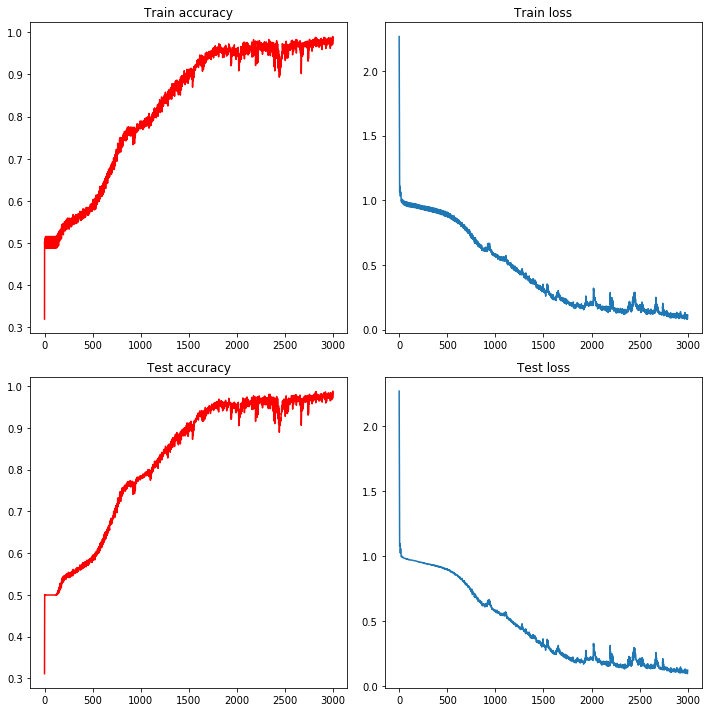

In [50]:
#Plots
fig = plt.figure(figsize=(10,10)) 
plt.subplot(2,2,1)
plt.title('Train accuracy')
plt.plot(range(len(train_acc)), train_acc, color='r')
plt.subplot(2,2,2)
plt.title('Train loss')
plt.plot(range(len(train_losses)), train_losses)
plt.subplot(2,2,3)
plt.title('Test accuracy')
plt.plot(range(len(test_acc)), test_acc, color='r')
plt.subplot(2,2,4)
plt.title('Test loss')
plt.plot(range(len(test_losses)), test_losses)
plt.tight_layout()